# LIN REG

In [211]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

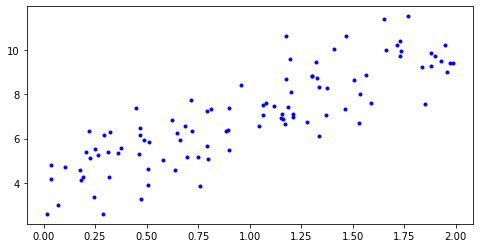

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(X, y, "b.")
plt.show()

In [213]:
# NORMAL EQUASION

X_mat = np.c_[np.ones((100, 1)), X] # add 1 (BIAS term) to each instance

theta_best = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
theta_best

array([[3.96112191],
       [3.11770767]])

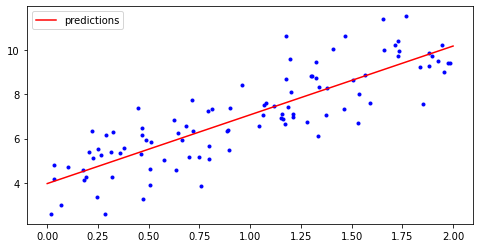

In [214]:
X_new = np.array([[0], [2]])
X_new_mat = np.c_[np.ones((2, 1)), X_new]

y_pred = X_new_mat.dot(theta_best)

plt.figure(figsize=(8, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-", label="predictions")
plt.legend()
plt.show() 

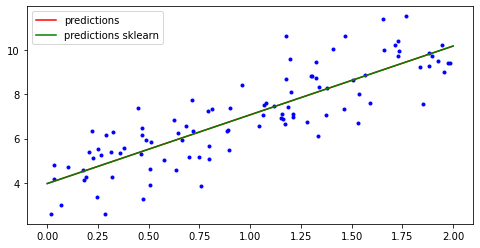

In [215]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred2 = lin_reg.predict(X_new)

plt.figure(figsize=(8, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-", label="predictions")
plt.plot(X_new, y_pred2, "g-", label="predictions sklearn")
plt.legend()
plt.show() 

# same as ours

In [216]:
lin_reg.intercept_, lin_reg.coef_

(array([3.96112191]), array([[3.11770767]]))

In [217]:
# BATCH GRADIENT DESCENT
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2, 1)
for iter in range(n_iter):
    gradients = 2 / m * X_mat.T.dot(X_mat.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.96112191],
       [3.11770767]])

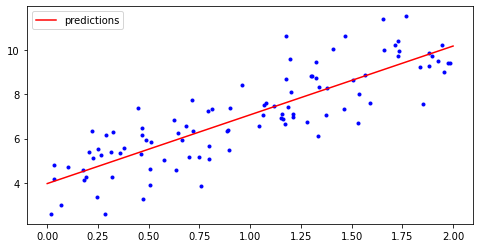

In [218]:
y_pred = X_new_mat.dot(theta)

plt.figure(figsize=(8, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-", label="predictions")
plt.legend()
plt.show() 

In [219]:
# STOCHASTIC GRADIENT DESCENT

n_epochs = 50
t0, t1 = 5, 50 # learning_schedule hyperparams

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)

        xi = X_mat[random_idx: random_idx + 1]
        yi = y[random_idx: random_idx + 1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.93719299],
       [3.07702604]])

In [220]:
# using sklearn
from sklearn.linear_model import SGDRegressor

# stop when loss is smaller than tol (or after max_iter)
# eta0 - starting learning rate
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [221]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97145043]), array([3.1059552]))

# POLY REG

In [222]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

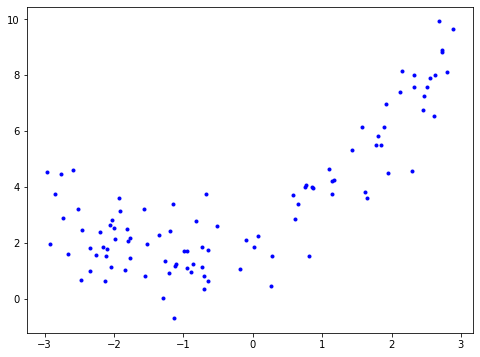

In [223]:
plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.show()

In [224]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [225]:
X

array([[-1.518233  ],
       [ 2.15787207],
       [-1.98713997],
       [ 2.12365729],
       [-2.92062712],
       [ 0.07068274],
       [ 1.61665548],
       [ 2.6087731 ],
       [ 2.45521282],
       [ 1.91774922],
       [ 2.3291481 ],
       [-1.80468188],
       [-1.29489423],
       [-1.26618885],
       [-0.73767641],
       [-0.64007598],
       [ 0.26733195],
       [-2.04072142],
       [ 1.14747998],
       [-1.99460076],
       [-1.13814911],
       [ 0.02007078],
       [ 1.77864337],
       [ 1.4368154 ],
       [ 0.87320614],
       [-2.06536044],
       [ 0.28227207],
       [-2.47532099],
       [-0.73582094],
       [-0.51890082],
       [-2.76113136],
       [-1.3560714 ],
       [ 2.7338968 ],
       [ 2.72179565],
       [-0.88603767],
       [-2.74139935],
       [-1.92543036],
       [-0.64669324],
       [ 2.68667819],
       [-2.15280562],
       [ 1.58109506],
       [-2.34790476],
       [ 2.88754546],
       [-0.71030101],
       [ 1.65140723],
       [-0

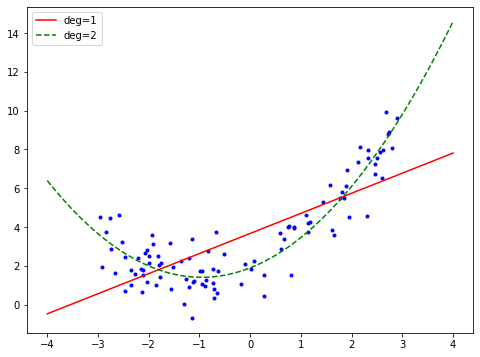

In [226]:
lin_reg = SGDRegressor()
lin_reg.fit(X, y.ravel())
poly_reg = SGDRegressor()
poly_reg.fit(X_poly, y.ravel())

x = np.linspace(-4, 4, 1000).reshape((-1, 1))
y_lin = lin_reg.predict(x)
y_poly = poly_reg.predict(poly_features.transform(x))

plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.plot(x, y_lin, "r-", label="deg=1")
plt.plot(x, y_poly, "g--", label="deg=2")
plt.legend(loc="upper left")
plt.show()

In [227]:
poly_reg.intercept_, poly_reg.coef_

(array([1.89792564]), array([1.02542148, 0.53758934]))

In [228]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    plt.figure(figsize=(8, 6))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.xlabel("training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.ylim([0., 3.])
    plt.show()

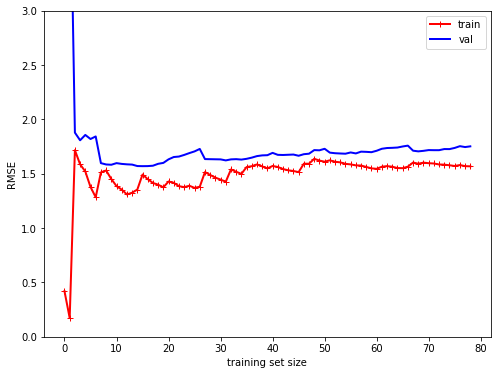

In [229]:
lin_reg = SGDRegressor()
plot_learning_curves(lin_reg, X, y.ravel())

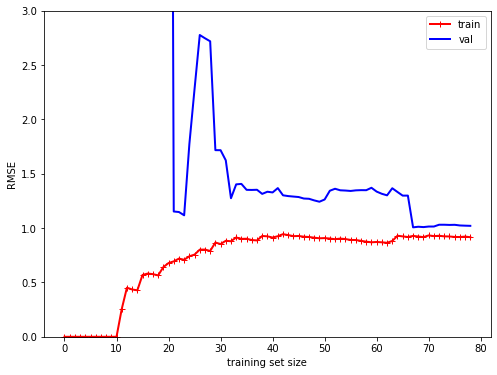

In [230]:
from sklearn.pipeline import Pipeline

poly_pip = Pipeline([
    ("features", PolynomialFeatures(degree=10, include_bias=False)),
    ("reg", LinearRegression()),
])

plot_learning_curves(poly_pip, X, y.ravel())

# REGULARISATION

In [231]:
# ridge regression using SVD
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([5.23688756])

In [232]:
# ridge regression using gradient descent
ridge_reg = SGDRegressor(penalty="l2")
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([5.19244955])

In [233]:
# lasso regression using SVD
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

array([5.18799046])

In [234]:
# lasso regression using gradient descent
lasso_reg = SGDRegressor(penalty="l1")
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

array([5.21498643])

In [235]:
# elastic net
from sklearn.linear_model import ElasticNet

# l1_ratio - how important is l1, (l2_ratio = 1 - l1_ratio)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y.ravel())
elastic_net.predict([[1.5]])

array([5.18777503])

# EARLY STOPPING

In [236]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel())

In [237]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_p_sc = poly_scaler.fit_transform(X_train)
X_val_p_sc = poly_scaler.transform(X_val)

In [238]:
from copy import deepcopy

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_p_sc, y_train)
    y_val_pred = sgd_reg.predict(X_val_p_sc)
    val_error = mean_squared_error(y_val, y_val_pred)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

# Iris dataset

In [239]:
from sklearn.datasets import load_iris

iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [240]:
X, y = iris["data"], iris["target"]

In [241]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [242]:
import pandas as pd
pd.DataFrame(y).value_counts()

0    50
1    50
2    50
dtype: int64

In [243]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [244]:
X_ir = X[:, 3:] # petal width
y_ir = (y == 2).astype(int) # if iris vignica or not

In [245]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_ir, y_ir)

LogisticRegression()

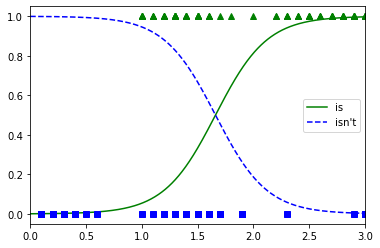

In [246]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label=("is"))
plt.plot(X_new, y_proba[:, 0], "b--", label=("isn't"))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.legend()
plt.xlim([0., 3.])
plt.show()

In [247]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [248]:
X_ir = X[:, (2, 3)] # this time width and length

log_reg = LogisticRegression(solver="lbfgs", C=10e10, random_state=42)
log_reg.fit(X_ir, y_ir)

LogisticRegression(C=100000000000.0, random_state=42)

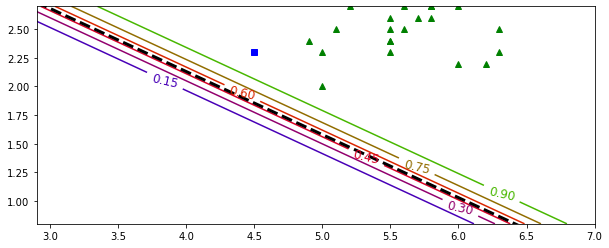

In [249]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

Z = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, Z, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [250]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X_ir, y)

LogisticRegression(C=10, multi_class='multinomial')

In [251]:
softmax_reg.predict([[5, 2]])

array([2])

In [252]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

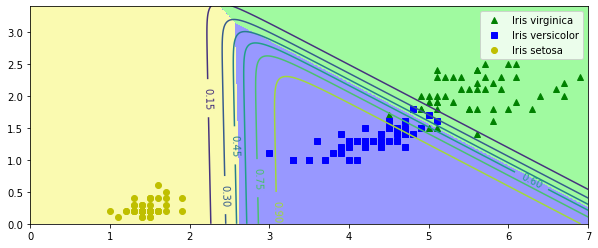

In [253]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 800).reshape(-1, 1),
    np.linspace(0, 4, 500).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_pred = softmax_reg.predict(X_new)

Z1 = y_proba[:, 1].reshape(x0.shape)
Z2 = y_pred.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, Z2, cmap=custom_cmap)
countour = plt.contour(x0, x1, Z1)
plt.clabel(countour, inline=1)
plt.legend()
plt.axis([0, 7, 0, 3.4])
plt.show()

# Exerices

In [254]:
X = iris["data"]
y = iris["target"]

In [255]:
m = X.shape[0]

In [256]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [257]:
# prepare the data
pipeline = Pipeline([
    ("scaler", StandardScaler()),
])
X_prep = pipeline.fit_transform(X_train)

In [263]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1, tol=0, warm_start=True, penalty="none")

In [264]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    softmax_reg.fit(X_train, y_train)
    y_val_pred = softmax_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_pred)

    if val_error < minimum_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(softmax_reg)

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [265]:
best_model.intercept_, best_model.coef_

(array([ 1.07138237,  8.45218842, -9.5235708 ]),
 array([[ 2.44308557,  5.52953769, -7.15258379, -3.84726924],
        [ 1.24749461, -0.80196704,  0.09662433, -5.59137643],
        [-3.69058018, -4.72757065,  7.05595946,  9.43864567]]))

In [266]:
min_val_error

0.07894736842105263

In [267]:
y_pred = best_model.predict(X_val)

from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.9210526315789473